<a href="https://colab.research.google.com/github/taha-koroglu/gumushane_eem_eesec440/blob/main/code/xor_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta bu kodda kullanacağımız **fonksiyonları** çağıracağımız **kütüphaneleri** dahil ediyoruz. 

First we import the **libraries** to use the functions that we are going to invoke in this code.

In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys

Bildiğimiz gibi, *XOR* problemi *Elektrik-Elektronik Mühendisliğinde* sayısal devreler (logic circuits) alanında karşımıza çıkan bir problem. **İki girişli ve tek çıkışlı** bir sistemin girişleri *TRUE-FALSE* (veya *1-0* veya *HIGH-LOW*) olarak isimlendirilen *Boolean* veri tipinde değer alıyorlar. Benzer şekilde çıkış da yine *1-0* Boolean değişkenlerinden birisi oluyor.

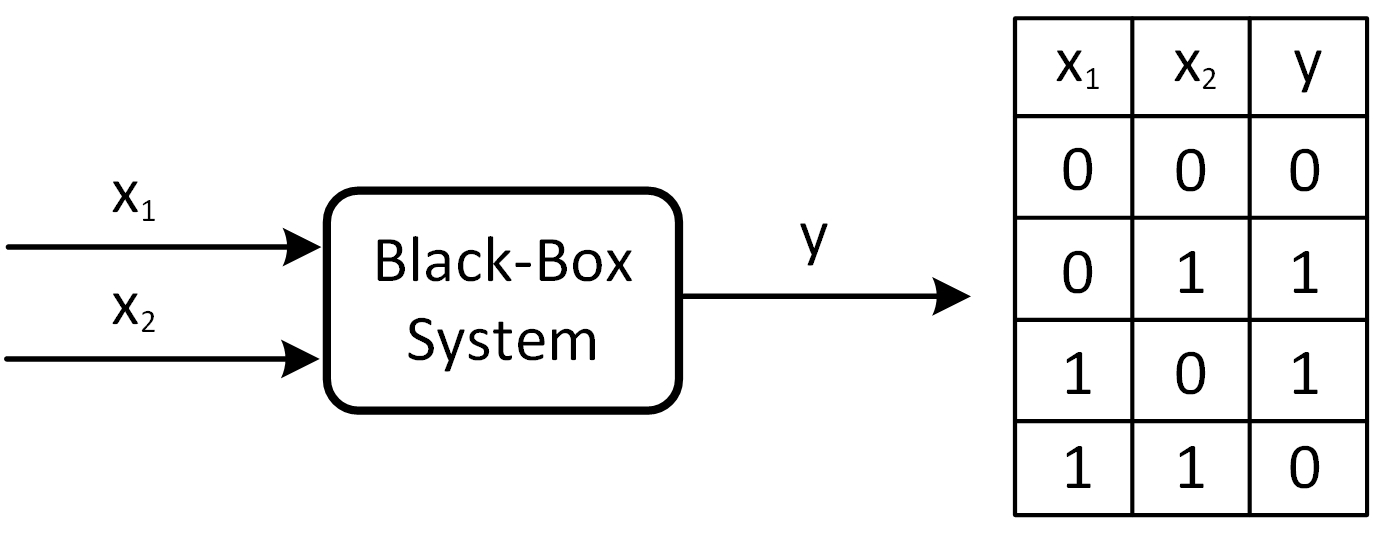

Aşağıda **numpy** kütüphanesi kullanarak *giriş* ve *hedef verisini* (**input and target data**) oluşturduk. Dikkat edin, burada hedef verisine İngilizce'de **annonation** deniyor. Yani bizler hedef değişkenini oluşturduğumuzda giriş verisini **annotate** etmiş oluyoruz.

In [42]:
trainingData = np.array([[0,0], [0,1], [1,0], [1,1]], "float32") # eğitim verisi - sisteme giriş yapacak
targetData = np.array([[0], [1], [1], [0]], "float32") # hedef verisi - sistemin çıkış vermesini istediğimiz değerler

Yukarıda ürettiğimiz giriş-çıkış verisini aşağıda konsola yazdıralım.

Let's print the input-output data we generated above to the console.

In [43]:
print(trainingData)
print(targetData)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


**TF** kütüphanesinin içerisinde yer alan **Keras** kütüphanesiyle bir tane çok katmanlı sinir ağı (**multi-layer perceptron** - **MLP**) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (**hidden layer**) sayısını ve bu katmanlardaki nöron sayısını ve de hangi aktivasyon fonksiyonunu kullandığımızı adım adım seçeceğiz.

In [63]:
model = tf.keras.models.Sequential(layers=None, name='xor_MLP')
model.add(tf.keras.layers.Dense(16, input_dim = 2, activation = 'relu', name='HL1'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (i.e., katman sayısı, katmanlardaki nöron sayısı, nöron çıkışlarında kullanılan aktivasyon fonskiyon tipleri) belirledik. Bir sonraki adım olarak öğrenme (**learning**) işlemini başlatacağız. Şimdi öğrenme işleminin (**learning process**) nasıl olacağını ayarlayalım.

In [64]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='binary_accuracy')
model.summary()

Model: "xor_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 16)                48        
_________________________________________________________________
outputLayer (Dense)          (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz. Burada kullanılan fonksiyonun ismi **fit** yani *uydurma* demek.

Lastly, we start training the configured MLP.

In [65]:
history=model.fit(trainingData, targetData, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 332ms/step - loss: 0.2510 - binary_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2505 - binary_accuracy: 0.2500
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2501 - binary_accuracy: 0.2500
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2497 - binary_accuracy: 0.2500
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2492 - binary_accuracy: 0.2500
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - binary_accuracy: 0.2500
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.2484 - binary_accuracy: 0.2500
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2479 - binary_accuracy: 0.2500
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2475 - binary_accuracy: 0.2500
Epoch 10/200
1/1 [==============================] - 0s 5ms/ste

Eğitimi tamamlanan yapay sinir ağını şimdi test edelim. Aslında test etmeye gerek yok ama ne olduğunu anlamak için giriş verisini son halini alan çok katmanlı yapay sinir ağına verelim ve çıkışa bakalım. Burda geçen fonksiyonun ismi **predict** yani *tahmin etme* ifadesi kullanılmış.

In [66]:
model.predict(trainingData).round()

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Optimizasyon problemlerinde kullanılan önemli bir terminoloji **loss function**. Bu fonksiyonu minimize etmeye çalışıyoruz.

Text(0.5, 1.0, 'loss fcn vs. epoch number')

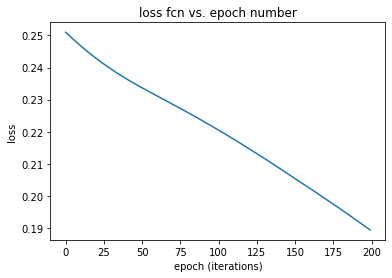

In [67]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
# plt.legend(loc='upper right')
plt.xlabel("epoch (iterations)")
plt.ylabel("loss")
plt.title("loss fcn vs. epoch number")

Text(0.5, 1.0, 'Accuracy vs. epoch number')

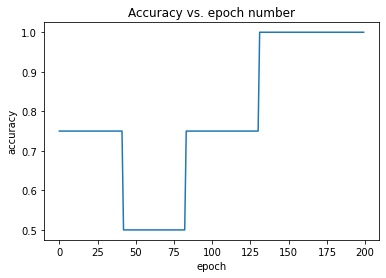

In [61]:
accuracyCurve = history.history["binary_accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
# plt.legend(loc='upper left')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy vs. epoch number")